#  Titanic Survival Data Set
## by Ahmed Kamel Hassan

## Preliminary Wrangling



> survival: Survival (0 = No; 1 = Yes)

> Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

> Name: Passenger's Name

> Sex: Passerger's sex; (male or female)

> Age: Age of the Passenger in years	

> Sibsp: Number of Siblings/Spouses Aboard

> Parch: Number of Parents/Children Aboard

> Ticket: Ticket Number

> Fare: Passenger Fare

> Cabin: Cabin Number

> Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [82]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> dataset contain 891 rows and 12 columns


> the main feature in the data set is the percentage of passengers surviving


> the most features will help me to get a correlation between the survived and not survived passengers are (Age , Sex and Pclass), may if the passenger have any relatives aboard titanic would help investigating the relationship between it and the passenger survived.

In [6]:
# removing duplicates from dataset:
df.duplicated().sum()

0

In [7]:
# removing unnecessary columns :
df = df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis = 1)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [9]:
# there are some null values in Age column ...
df['Age'].isnull().sum()

177

##### we don't have the information of age of 177 passengers ( 20% of #passengers ), .... this will affect the result of surviving with respect to the Ages and also any relation contain ages will be affected, but we can't drop them because they will also affect the result as ( we said they 20% of our data )

In [10]:
null_age = pd.isnull(df['Age'])
null_age_female = df[null_age]['Sex'] == 'female'
null_age_male = df[null_age]['Sex'] == 'male'
null_age_female.sum() , null_age_male.sum()

(53, 124)

##### 53 female passengers have missing value in Age and 124 male passenger have missing value ..

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


## Univariate Exploration

### investigate distributions of individual variables

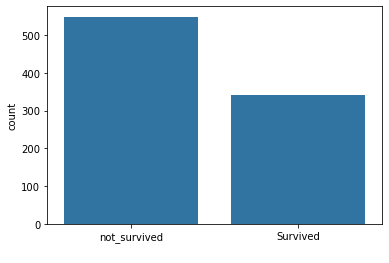

In [12]:
# investigate number of survived and not_survived passengers.

color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Survived', color = color);
x = [0,1]
xticks = ['not_survived','Survived']
plt.xticks(x,xticks);
plt.xlabel(' ');

##### Number of not survived passengers are more than the survived 

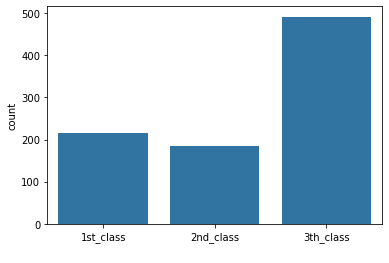

In [13]:
# investigate the counts of passengers for each class.

color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Pclass', color = color);
x = [0,1,2]
xticks = ['1st_class','2nd_class','3th_class']
plt.xticks(x,xticks);
plt.xlabel(' ');

##### Most of the passengers were in the third class, pretected to be less expensive!!

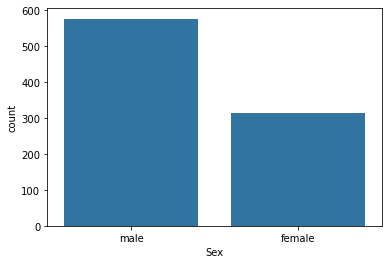

In [14]:
# investigate Sex counts of passengers .

color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Sex', color = color);

##### Most of the passengers were male.

In [15]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

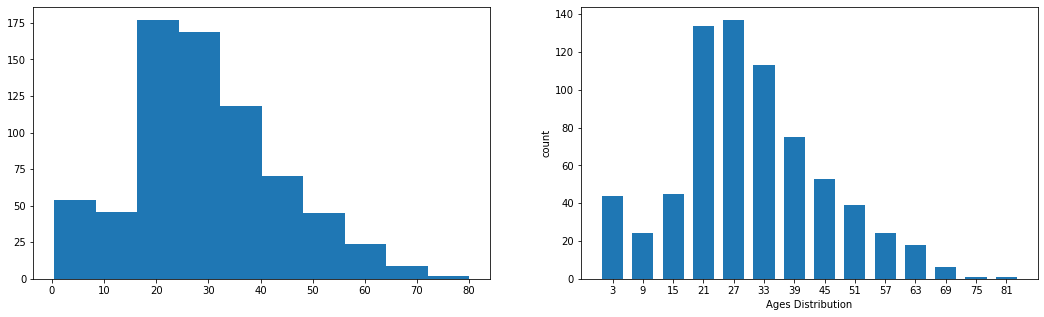

In [16]:
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
plt.hist(data = df, x = 'Age' );

plt.subplot(1,2,2)
bins = np.arange(0,df['Age'].max()+6,6)
plt.hist(data = df, x = 'Age', bins=bins, rwidth=0.7);
plt.xticks(np.arange(3,df['Age'].max()+6,6));
plt.xlabel('Ages Distribution');
plt.ylabel('count');

In [17]:
df['Age'].mean()

29.69911764705882

##### the age distribution is right-skewed, we note that the largest number of passengers were their ages ranging from 20 to 35 and the mean age of all passengers is = 29.7

In [18]:
# investigate number of SibSp for passengers.
df['SibSp'].value_counts() # Qualitative Variable

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

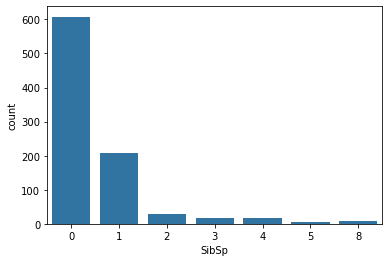

In [19]:
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'SibSp', color = color);

##### Most of the passengers do not have Siblings or Spouses Aboard titanic, and number of passengers who have 4 SibSp slightly more than who have 3. but in general, as number of Siblings/Spouses Aboard increased, the number of passengers decreased.

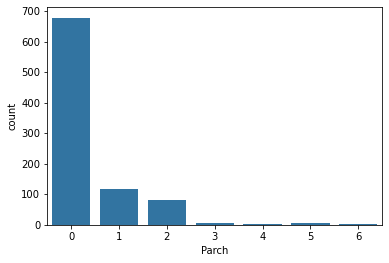

In [20]:
# investigate Parch for passengers.
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Parch', color = color);

###### Most of the passengers do not have parents or children Aboard titanic.

## Bivariate Exploration



In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [22]:
df['Sex'].replace({'male' : 1, 'female' : 0}, inplace = True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


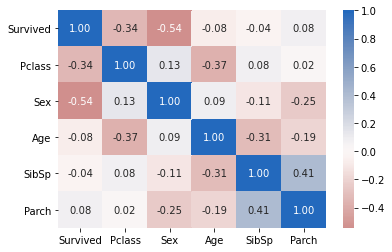

In [24]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### from heatmap it is seemed that there are good relationship between :
> 5) negative relationship between "Sex" vs. "Survived"

> 1) positive relationship between "Parch" vs. "SibSP"

> 2) negative relationship between "Pclass" vs. "Age"

> 3) negative relationship between "Pclass" vs. "Survived"

> 4) negative relationship between "SibSp' vs. "Age"

In [25]:
df['Sex'].replace({1 : 'male', 0 : 'female'}, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


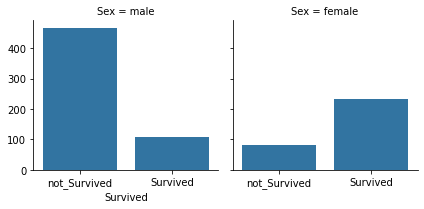

In [26]:
# Survived sv. Sex: 

g = sb.FacetGrid(data = df, col = 'Sex');
g.map(sb.countplot,'Survived');
plt.xticks([0,1],['not_Survived','Survived']);
plt.xlabel(' ');

In [27]:
df2 = df.groupby(['Survived','Sex']).size()
df2 = df2.reset_index(name = 'count')
df2 = df2.pivot(index = 'Sex', columns = 'Survived', values = 'count')
df2

Survived,0,1
Sex,,
female,81,233
male,468,109


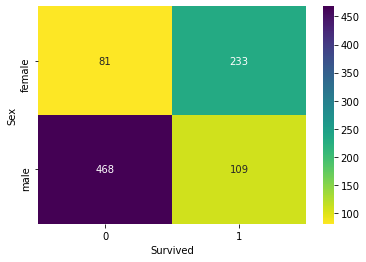

In [28]:
sb.heatmap(data = df2, annot = True, fmt = "0.0f", cmap = 'viridis_r');

In [29]:
males = df[df['Sex'] == 'male']
total_males = males['Survived'].value_counts().sum()
survived_males = males['Survived'].value_counts()[1]
survived_males_per = survived_males / total_males
print('percentage of survived males are w.r.t the number of males passengers : ',survived_males_per)

percentage of survived males are w.r.t the number of males passengers :  0.18890814558058924


In [30]:
females = df[df['Sex'] == 'female']
total_females = females['Survived'].value_counts().sum()
survived_females = females['Survived'].value_counts()[1]
survived_females_per = survived_females / total_females
survived_females_per
print('percentage of survived females are w.r.t the number of females passengers : ',survived_females_per)

percentage of survived females are w.r.t the number of females passengers :  0.7420382165605095


##### for females : number of survived were more than dead,  for males : number of dead were more than survived.
##### % of survived females are more than males

In [31]:
# Parch vs. SibSp : 

# the two variables are categorical so we can depict the relationship between them using Clastured Bar Chart.
# Returns the types for Parch and SibSp with the categories and orderedness.

# Types of Parch
#Parch_order = [0,1,2,3,4,5,6]
#ordring1 = pd.api.types.CategoricalDtype(ordered=True, categories = Parch_order)
#df['Parch'] = df['Parch'].astype(ordring1);

# Types of SibSp :

#SibSp_order = [0,1,2,3,4,5,8]
#ordring2 = pd.api.types.CategoricalDtype(ordered=True, categories = Parch_order)
#df['SibSp'] = df['SibSp'].astype(ordring2);

In [32]:
# if we make categories for SibSp we will see than tha number of passengers who have 8 SibSp will be "NAN" !!!

In [33]:
# Parch vs. SibSp : ( Positive relationship)

cluster_data = df.groupby(["Parch","SibSp"]).size()

In [34]:
cluster_data = cluster_data.reset_index(name='count')

In [35]:
cluster_data = cluster_data.pivot(index = 'Parch', columns = 'SibSp', values = 'count')

In [36]:
cluster_data

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,537.0,123.0,16.0,2.0,NaN,NaN,NaN
1,38.0,57.0,7.0,7.0,9.0,NaN,NaN
2,29.0,19.0,4.0,7.0,9.0,5.0,7.0
3,1.0,3.0,1.0,NaN,NaN,NaN,NaN
4,1.0,3.0,NaN,NaN,NaN,NaN,NaN
5,2.0,3.0,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,NaN,NaN,NaN,NaN,NaN


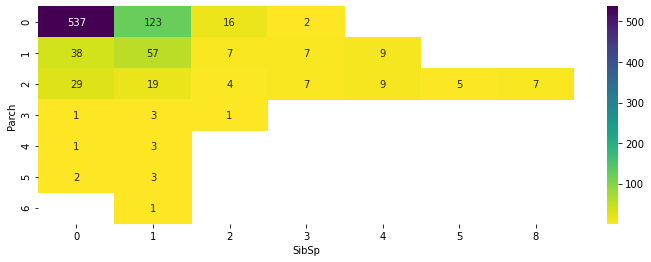

In [37]:
plt.figure(figsize = [12,4])
sb.heatmap(cluster_data, annot = True, fmt = '0.0f', cmap = 'viridis_r');


In [38]:
df.query("Parch == 0 and SibSp == 0").shape[0] / df.shape[0]

0.6026936026936027

##### 60% of passengers didnot have any Parch or SibSp.

##### 13.8% of passengers have 1 SibSp and 0 Parch.

##### 6.4%  of passengers have 1 SibSp and 1 Parch.

##### 4.3%  of passengers have 0 SibSp and 1 Parch.

##### 3.5%  of passengers have 0 SibSp and 2 Parch.


##### 2.0%  of passengers have 1 SibSp and 2 Parch.

##### 1.8%  of passengers have 0 SibSp and 0 Parch.


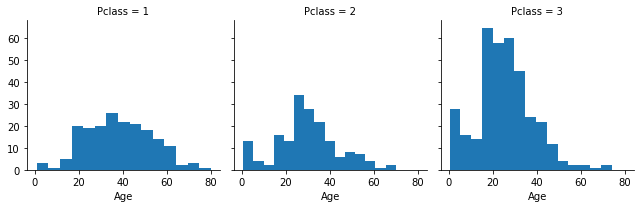

In [39]:
# "Pclass" vs. "Age" ( negative relationship ) corr = -0.37

g = sb.FacetGrid(data = df, col = 'Pclass');
g.map(plt.hist,'Age',bins = 15);


##### because class 1 is better than class 2 better than class 3, we can conclude that as class increased (1> 2> 3) the ages of passengers included increased 

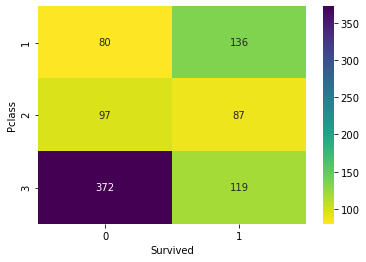

In [40]:
# "Pclass" vs. "Survived" ( negative relationship ) corr = -0.34

cluster_data_2 = df.groupby(['Pclass','Survived']).size()
cluster_data_2 = cluster_data_2.reset_index(name = 'value')
cluster_data_2 = cluster_data_2.pivot(index = 'Pclass', columns = 'Survived', values = 'value')
sb.heatmap(data = cluster_data_2, annot = True, fmt = '0.0f' ,cmap = 'viridis_r');

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


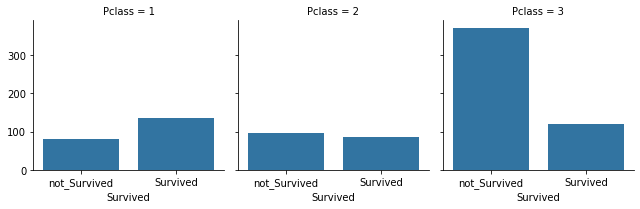

In [41]:
g = sb.FacetGrid(data = df, col = 'Pclass');
g.map(sb.countplot,'Survived');
plt.xticks([0,1],['not_Survived','Survived']);


>  We had expected that the number of survived passengers increase with class ( 1>2>3 ), it's seemed that Survived passengers in class 1 are more than the others.

> survived in class 2 less than class 3.
>  number of not survived passengers in class 3 more than 2 and class 2 more than class 1
###### we can note that number of not survived passengers increased as passenger class decrease ( class 3 less than 2 less than 1 ), class 1 is the best class and class 3 is the worst. 

In [43]:
# SibSp vs. Age: 

In [44]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\User\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


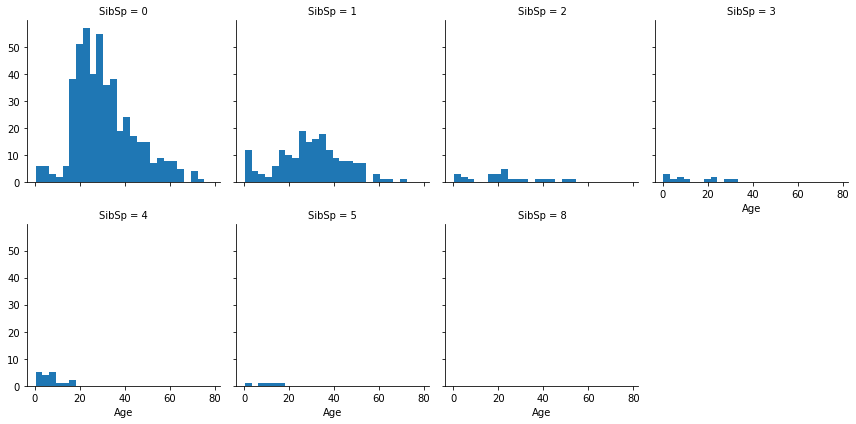

In [45]:
bins_edge = np.arange(0.4,80,3)
g = sb.FacetGrid(data = df, col = 'SibSp', col_wrap = 4);
g.map(plt.hist,"Age", bins = bins_edge);

##### as number of SibSp increased, the mean age of passengers decreased !!!

In [47]:
df[df['SibSp']==8]

,Survived,Pclass,Sex,Age,SibSp,Parch
159,0,3,male,NaN,8,2
180,0,3,female,NaN,8,2
201,0,3,male,NaN,8,2
324,0,3,male,NaN,8,2
792,0,3,female,NaN,8,2
846,0,3,male,NaN,8,2
863,0,3,female,NaN,8,2


#### we can see that as number of SibSp increased, the passenger's Age decreased and also the the passenger's Age distribution in each SibSp figure decreased.

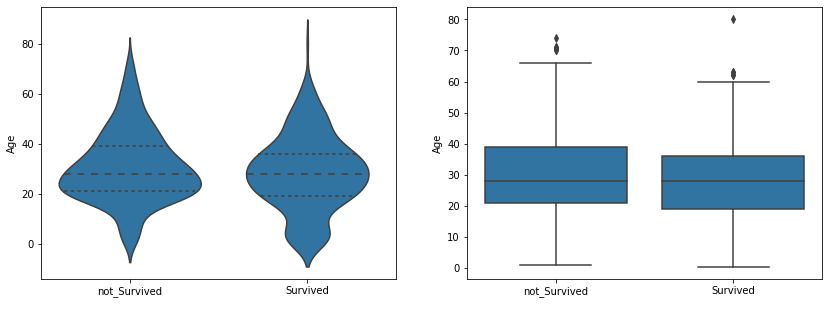

In [48]:
# survived vs. Age: 

plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'Survived', y = 'Age', inner = 'quartile', color = color);
plt.xticks([0,1],['not_Survived','Survived']);
plt.xlabel(' ');

plt.subplot(1,2,2)
color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'Survived', y = 'Age', color = color);
plt.xticks([0,1],['not_Survived','Survived']);
plt.xlabel(' ');

##### long tail for survived violin plot tell us that there are outliers with increase in the ages of some survivors.
##### The distribution for not survived passengers slightly more peaked,  meaning that there is an increase in the distribution of not survived passengers in the age group between 18 ~ 34 more than survived.

> as we measure the effect of all variable on survived passenger number we can see that as Pclass decreased (3<2<1) the not survived passengers increased, this is our main relationship till now.


###  relationships between the other features

> the distribution of passengers Ages decreases as Number of Siblings or Spouses Aboard decreased ..!
> because class 1 is better than class 2 better than class 3, we can conclude that as class increased (1> 2> 3) the ages of passengers included increased

## Multivariate Exploration



In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [50]:
df['Sex'].replace({1 : 'male',0 : 'female'}, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


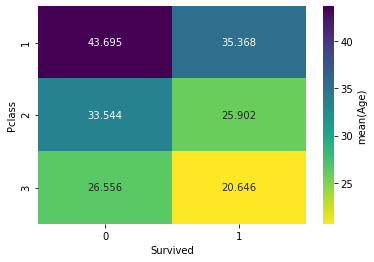

In [51]:
# ages of survived in each class 

age_sur_class = df.groupby(['Survived', 'Pclass']).mean()['Age']
age_sur_class = age_sur_class.reset_index(name = 'Age_avg')
age_sur_class = age_sur_class.pivot(index = 'Pclass', columns = 'Survived',
                            values = 'Age_avg')
sb.heatmap(age_sur_class, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Age)'}, cmap = 'viridis_r');

##### as class increased ( 1>2>3 ) mean age of passengers who survived ( and also not survived ) increased 
#####  in general mean age of passengers who dead ( in each class ) heigher that the mean age of survived passengers 

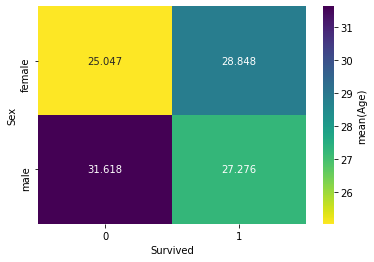

In [53]:
# mean age of males and females survived:

sex_sur_class = df.groupby(['Survived', 'Sex']).mean()['Age']
sex_sur_class = sex_sur_class.reset_index(name = 'Age_avg')
sex_sur_class = sex_sur_class.pivot(index = 'Sex', columns = 'Survived',
                            values = 'Age_avg')
sb.heatmap(sex_sur_class, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Age)'}, cmap = 'viridis_r');

##### the mean age of male passengers who survived approximately equal to that for female, but for not survived passengers, the mean age for male higher w.r.t females (there is no direct relationship )

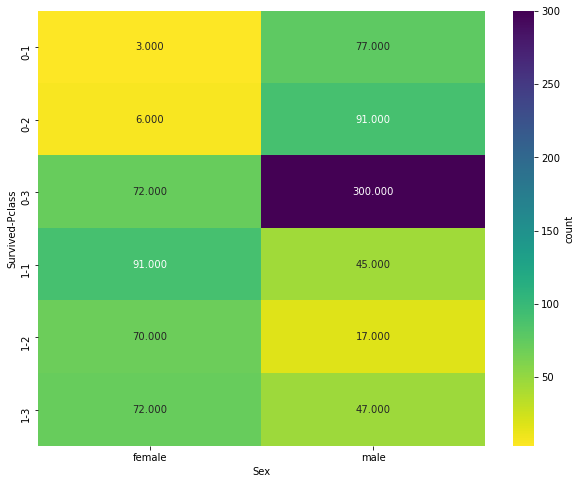

In [88]:
# sex of survived in each class 
plt.figure(figsize=[10,8])
sex_sur_class = df.groupby(['Survived', 'Pclass', 'Sex']).size()
sex_sur_class = sex_sur_class.reset_index(name = 'count')
sex_sur_class = sex_sur_class.pivot(index = ['Survived','Pclass'], columns = 'Sex', values = 'count');
sb.heatmap(sex_sur_class, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'count'}, cmap = 'viridis_r');

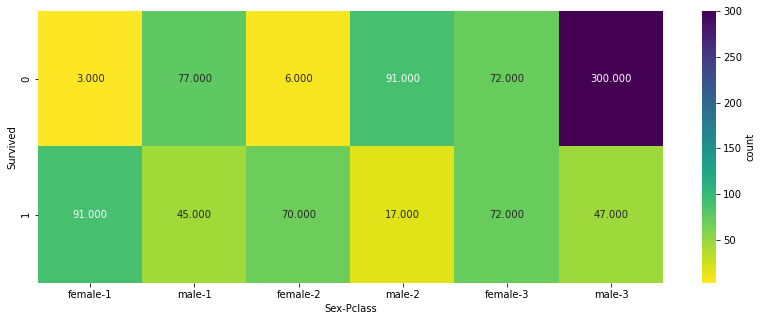

In [85]:
plt.figure(figsize=[14,5])
sex_sur_class = df.groupby(['Survived', 'Pclass', 'Sex']).size()
sex_sur_class = sex_sur_class.reset_index(name = 'count')
sex_sur_class = sex_sur_class.pivot(index = 'Survived', columns = ['Sex','Pclass'], values = 'count');
sb.heatmap(sex_sur_class, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'count'}, cmap = 'viridis_r');

In [81]:
df[['Pclass','Sex']].value_counts(sort = False)


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

#### we can note that :
> number of survived females in each class is higher than survived males, in spite of the number of females in each class in less than males 

> as class become better (1 > 2 > 3 ) number of deads ( for each sex ) decreased 

## interesting or surprising interactions between features?

> as class increased ( 1>2>3 ), the mean age of survived passengers increased.

> also with increasing in class ( 1>2>3 ), the mean age of dead passengers increased.

> mean age of passengers who dead ( in each class ) heigher that the mean age of survived passengers

> number of survived females in each class is higher than survived males, in spite of the number of females in each class in less than males